## 목표 : 유튜브 랭킹 Site

 - 수집 : (카테고리별, 구독자수, 채널명, 비디오수)
 - 데이터 처리 : DF(구독자 수별, 카테고리별)
 - 저장 : 엑셀로저장
 - 시각화 : 유튜브 랭킹 데이터 pie() 함수를 사용 
     - 엑셀에서 데이터 불러오기
     - 카테고리별 구독자수, 채널수

In [2]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import pandas as pd

browser = webdriver.Chrome('C:/myexam/chromedrive/chromedriver.exe')
url = 'https://youtube-rank.com/board/bbs/board.php?bo_table=youtube'
browser.get(url)

#페이지 정보 가져오기
html = browser.page_source
soup = BeautifulSoup(html, 'html.parser')

#beautifulSoup로 tr태크 추출하기

channel_list = soup.select('tr')
print(len(channel_list))
print(channel_list[0])

102
<tr>
<th class="rank"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=rank&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">순위 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="td_img">이미지</th>
<th class="subject">제목</th>
<th class="subscriber_cnt"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=subscriber_cnt&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">구독자순 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="view_cnt"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=view_cnt&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">View순 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="video_cnt"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=video_cnt&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">Video순 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="hit"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=wr_hit&am

In [5]:
# tr 태크 확인하기
channel_list = soup.select('form > table > tbody > tr')
print(len(channel_list))

100


In [7]:
channel = channel_list[0]
print(channel)

<tr class="aos-init aos-animate" data-aos="fade-up" data-aos-duration="800">
<td class="rank">
                        1                    </td>
<td class="td_img">
<div class="info_img"><a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203"><img class="lazyload" data-src="https://yt3.ggpht.com/ytc/AKedOLTat8_vr7h2i29n67lvNLMp1F-9Ch2ejFRlRzt0zQ=s88-c-k-c0x00ffffff-no-rj-mo" height="88" src="https://yt3.ggpht.com/ytc/AKedOLTat8_vr7h2i29n67lvNLMp1F-9Ch2ejFRlRzt0zQ=s88-c-k-c0x00ffffff-no-rj-mo" width="88"/></a></div>
<p class="info_rank">1</p>
</td>
<td class="subject">
<h1>
<p <a="" class="category" href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;sca=%EC%9D%8C%EC%95%85%2F%EB%8C%84%EC%8A%A4%2F%EA%B0%80%EC%88%98">[음악/댄스/가수]
                                
                                </p>
<a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203">
								
								BLACKPINK							</a>
<span>
<i class="

In [10]:
#카테고리 가져오기
category = channel.select('p.category')[0].text.strip()
print(category)

[음악/댄스/가수]


In [11]:
#채널명
title = channel.select('h1 > a')[0].text.strip()
print(title)

BLACKPINK


In [17]:
# 구독자 수 , View 수, 동영상 수 추출하기
subscribe = channel.select('td.subscriber_cnt')[0].text
view = channel.select('td.view_cnt')[0].text
video = channel.select('td.video_cnt')[0].text

print(subscribe)
print(view)
print(video)

6410만
190억1809만
371개


In [18]:
channel_list = soup.select('tbody>tr')
for channel in channel_list:
    title = channel.select('h1 > a')[0].text.strip()
    category = channel.select('p.category')[0].text.strip()
    subscribe = channel.select('td.subscriber_cnt')[0].text
    view = channel.select('td.view_cnt')[0].text
    video = channel.select('td.video_cnt')[0].text
    print(title, category, view, video)


BLACKPINK [음악/댄스/가수] 190억1809만 371개
HYBE LABELS [음악/댄스/가수] 187억5681만 655개
BANGTANTV [음악/댄스/가수] 122억1297만 1,580개
SMTOWN [음악/댄스/가수] 219억1233만 3,729개
Boram Tube Vlog [보람튜브 브이로그] [키즈/어린이] 110억5288만 223개
1MILLION Dance Studio [음악/댄스/가수] 66억9899만 2,909개
1theK (원더케이) [음악/댄스/가수] 206억1414만 14,992개
JYP Entertainment [음악/댄스/가수] 137억4230만 1,330개
Coldplay [미분류] 127억7603만 280개
Mnet K-POP [음악/댄스/가수] 129억7041만 25,462개
JFlaMusic [음악/댄스/가수] 34억2183만 279개
KBS WORLD TV [TV/방송] 123억6867만 52,401개
officialpsy [음악/댄스/가수] 86억2675만 90개
Jane ASMR 제인 [음식/요리/레시피] 49억2091만 1,191개
BIGBANG [음악/댄스/가수] 66억7998만 773개
TWICE [음악/댄스/가수] 22억0692만 592개
Nao FunFun [키즈/어린이] 389만 34개
Stone Music Entertainment [음악/댄스/가수] 78억6926만 7,930개
DuDuPopTOY [키즈/어린이] 43억7356만 1,747개
Hongyu ASMR 홍유 [음식/요리/레시피] 26억9793만 386개
핑크퐁 (인기 동요・동화) [키즈/어린이] 57억1502만 2,228개
MBCkpop [TV/방송] 73억6619만 40,660개
서은이야기[SeoeunStory] [키즈/어린이] 39억9835만 1,002개
Larva TUBA [키즈/어린이] 40억5236만 2,878개
Toymong tv 토이몽TV [키즈/어린이] 38억2556만 1,834개
The Late Show with Stephe

IndexError: list index out of range

In [19]:
#페이지별 URL 만들기
page = 1
url = 'https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={}'.format(page)
print(url)


https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=1


In [20]:
results =[]
for page in range(1,11):
    url ='https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={page}'
    browser.get(url)
    time.sleep(2)
    html = browser.page_source
    soup = BeautifulSoup(html, 'html.parser')
    channel_list = soup.select('form > table > tbody > tr')
    for channel in channel_list:
        title = channel.select('h1 > a')[0].text.strip()
        category = channel.select('p.category')[0].text.strip()
        subscribe = channel.select('td.subscriber_cnt')[0].text
        view = channel.select('td.view_cnt')[0].text
        video = channel.select('td.video_cnt')[0].text
        data = [title, category, subscribe, view, video]
        results.append(data)
        

In [26]:
column = ['타이틀', '분류', '구독자수', '재생 수', '동영상 수']
df = pd.DataFrame(results, columns=column)
df.head()

,타이틀,분류,구독자수,재생 수,동영상 수
0,BLACKPINK,[음악/댄스/가수],6410만,190억1809만,371개
1,HYBE LABELS,[음악/댄스/가수],6040만,187억5681만,655개
2,BANGTANTV,[음악/댄스/가수],5650만,122억1297만,"1,580개"
3,SMTOWN,[음악/댄스/가수],2850만,219억1233만,"3,729개"
4,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],2650만,110억5288만,223개


In [27]:
df.to_excel('youtube_rank.xlsx', index = False)

## 유튜브 랭킹 데이터 시각화하기

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

#그래프에서 한글을 표기하기 위한 글꼴 변경
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Darwin':
    rc('font', fmaily = 'AppleGothic')
else:
    print('Check your OS system')
    

In [30]:
#데이터 살펴보기
df=pd.read_excel('youtube_rank.xlsx')
df.head()

,타이틀,분류,구독자수,재생 수,동영상 수
0,BLACKPINK,[음악/댄스/가수],6410만,190억1809만,371개
1,HYBE LABELS,[음악/댄스/가수],6040만,187억5681만,655개
2,BANGTANTV,[음악/댄스/가수],5650만,122억1297만,"1,580개"
3,SMTOWN,[음악/댄스/가수],2850만,219억1233만,"3,729개"
4,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],2650만,110억5288만,223개


In [31]:
df['replaced_subscriber'] = df['구독자수'].str.replace('만', '0000')
df.head()

,타이틀,분류,구독자수,재생 수,동영상 수,replaced_subscriber
0,BLACKPINK,[음악/댄스/가수],6410만,190억1809만,371개,64100000
1,HYBE LABELS,[음악/댄스/가수],6040만,187억5681만,655개,60400000
2,BANGTANTV,[음악/댄스/가수],5650만,122억1297만,"1,580개",56500000
3,SMTOWN,[음악/댄스/가수],2850만,219억1233만,"3,729개",28500000
4,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],2650만,110억5288만,223개,26500000


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   타이틀                  1000 non-null   object
 1   분류                   1000 non-null   object
 2   구독자수                 1000 non-null   object
 3   재생 수                 1000 non-null   object
 4   동영상 수                1000 non-null   object
 5   replaced_subscriber  1000 non-null   object
dtypes: object(6)
memory usage: 47.0+ KB


In [33]:
#Series 데이터 타입 변환하기
df['replaced_subscriber'] = df['replaced_subscriber'].astype('int')

In [34]:
#카테고리별 구독자 수 , 채널 수 피봇 테이블 생성하기
pivot_df = df.pivot_table(index = '분류', values = 'replaced_subscriber',  aggfunc = ['sum','count'])
pivot_df.head()

,sum,count
,replaced_subscriber,replaced_subscriber
분류,,
[BJ/인물/연예인],130600000.0,30
[TV/방송],797000000.0,120
[뉴스/정치/사회],198100000.0,30
[미분류],613100000.0,70
[애완/반려동물],41200000.0,10


In [35]:
#데이터 프레임의 칼럼명 변경하기
pivot_df.columns = ['subscriber_sum', 'category_count']
pivot_df.head()

,subscriber_sum,category_count
분류,,
[BJ/인물/연예인],130600000.0,30
[TV/방송],797000000.0,120
[뉴스/정치/사회],198100000.0,30
[미분류],613100000.0,70
[애완/반려동물],41200000.0,10


In [36]:
#데이터 프레임의 인덱스 초기화하기
pivot_df = pivot_df.reset_index()
pivot_df.head()

,분류,subscriber_sum,category_count
0,[BJ/인물/연예인],130600000.0,30
1,[TV/방송],797000000.0,120
2,[뉴스/정치/사회],198100000.0,30
3,[미분류],613100000.0,70
4,[애완/반려동물],41200000.0,10


In [37]:
#데이터프레임을 내림차순정렬하기
pivot_df = pivot_df.sort_values(by ='subscriber_sum', ascending=False)
pivot_df.head()

,분류,subscriber_sum,category_count
6,[음악/댄스/가수],4.942700e+09,350
8,[키즈/어린이],1.518500e+09,200
5,[음식/요리/레시피],9.070000e+08,150
1,[TV/방송],7.970000e+08,120
3,[미분류],6.131000e+08,70


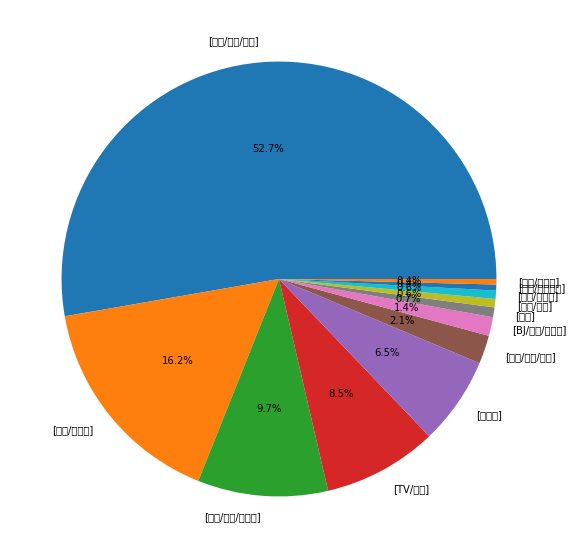

In [39]:
#카테고리별 구독자수 시각화하기 
plt.figure(figsize = (30,10))
plt.pie(pivot_df['subscriber_sum'], labels=pivot_df['분류'], autopct = '%1.1f%%')
plt.show()

In [40]:
# 카테고리별 채널 수 시각화 하기
pivot_df = pivot_df.sort_values(by ='category_count', ascending=False)
pivot_df.head()

,분류,subscriber_sum,category_count
6,[음악/댄스/가수],4.942700e+09,350
8,[키즈/어린이],1.518500e+09,200
5,[음식/요리/레시피],9.070000e+08,150
1,[TV/방송],7.970000e+08,120
3,[미분류],6.131000e+08,70


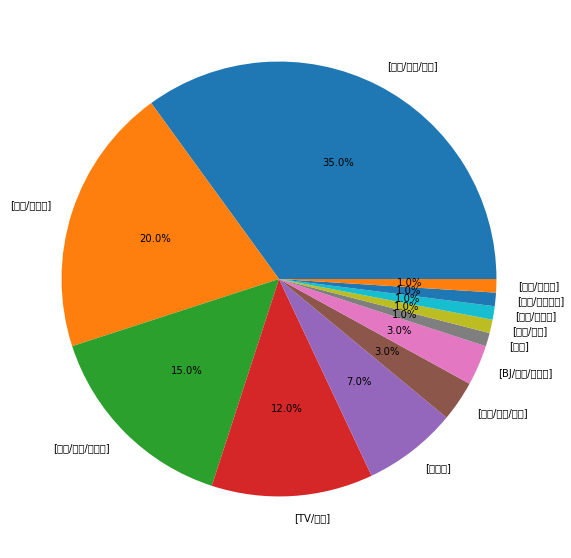

In [42]:
plt.figure(figsize = (30,10))
plt.pie(pivot_df['category_count'], labels=pivot_df['분류'], autopct = '%1.1f%%')
plt.show()